<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml06_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

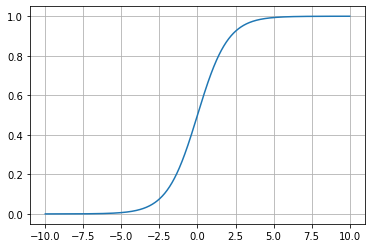

In [ ]:
x = np.linspace(start=-10, stop=10, num=1_000)  # -10 ~ 10 구간을 동일한 간격으로 1,000개로 나눔.
y = sigmoid(x)

plt.plot(x, y)
plt.grid()

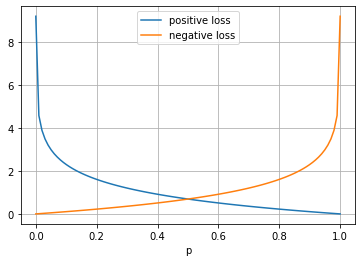

In [ ]:
# log 함수 그래프
p = np.linspace(start=0.0001, stop=0.9999, num=100)
y = - np.log(p)  # 양성 샘플의 비용 함수
y2 = - np.log(1 - p)  # 음성 샘플의 비용 함수
plt.plot(p, y, label='positive loss')
plt.plot(p, y2, label='negative loss')
plt.grid()
plt.xlabel('p')
plt.legend()

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
X, y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [14]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [16]:
# 꽃잎 길이(petal length)로 품종이 virginica인지 아닌지를 분류
X = X[:, 2:3]  # petal length 변수(특성/컬럼)만 선택, 컬럼 벡터(2d array)로 생성.
X[:5]

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4]])

In [17]:
y = (y == 2).astype(np.int16)  # 품종이 virginica이면 1, 그렇지 않으면 0
y[:5], y[-5:]

(array([0, 0, 0, 0, 0], dtype=int16), array([1, 1, 1, 1, 1], dtype=int16))

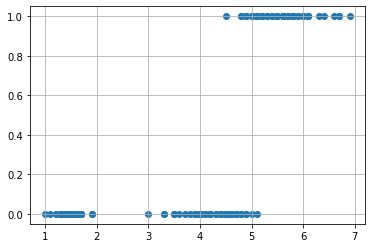

In [18]:
plt.scatter(X, y)
plt.grid()

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# 모델 생성
log_reg = LogisticRegression(random_state=1)

In [21]:
# 모델 훈련
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
intercept, coef = log_reg.intercept_, log_reg.coef_
#> intercept(절편): 1d array, coefficients(계수): 2d array
intercept, coef

(array([-17.51059761]), array([[3.59114121]]))

In [24]:
sample1, sample2 = X[0], X[-1]
sample1, sample2

(array([1.4]), array([5.1]))

In [25]:
lin_eq1 = intercept + coef[0, 0] * sample1[0]  # y = b0 + b1 * x
p = sigmoid(lin_eq1)
p  # 양성이 될 확률이 거의 0에 가깝다 => virginica X

array([3.79053376e-06])

In [26]:
lin_eq2 = intercept + coef[0, 0] * sample2[0]  # y = b0 + b1 * x
p = sigmoid(lin_eq2)
p  # 양성이 될 확률이 69% => virginica

array([0.690877])

In [28]:
# 훈련이 끝난 모델에서 예측 확률을 계산
y_pred_prob = log_reg.predict_proba(X)
y_pred_prob[0], y_pred_prob[-1]  #> [target=0일 확률, target=1일 확률]

(array([9.99996209e-01, 3.79053376e-06]), array([0.309123, 0.690877]))

In [29]:
# 훈련이 끝난 모델에서 예측값(0, 1)을 계산.
y_pred = log_reg.predict(X)

In [ ]:
np.mean(y == y_pred)

0.9533333333333334

In [30]:
# 모델 평가.
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=y_pred)

0.9533333333333334

In [31]:
precision_score(y, y_pred)

0.9215686274509803

In [32]:
recall_score(y, y_pred)

0.94

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[96,  4],
       [ 3, 47]])

In [34]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



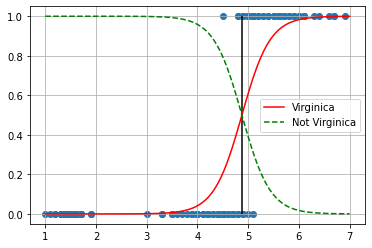

In [41]:
plt.scatter(X, y)  # 샘플 데이터

# 가상의 테스트 데이터
X_test = np.linspace(start=1, stop=7, num=100).reshape((100, 1))
y_test_pred = log_reg.predict_proba(X_test)
plt.plot(X_test, y_test_pred[:, 1], 'r-', label='Virginica')
plt.plot(X_test, y_test_pred[:, 0], 'g--', label='Not Virginica')

# 양성(virginica)일 확률이 0.5인 지점
x = np.min(X_test[y_test_pred[:, 1] >= 0.5])
plt.vlines(x, ymin=0, ymax=1, linestyles='solid')  
# 결정 경계(decision boundary): 양성/음성을 분류하는 경계

plt.legend()
plt.grid()

* iris 데이터 셋에서 꽃잎(petal) 길이, 너비 특성만 선택
* 2진 분류(virginica / virginica 아님 ) - Logistic Regression 이용
* 모델 훈련, 예측, 평가(report 출력)
* 시각화: x축(petal length), y축(petal width), 결정 경계(intercept_, coef_)

In [48]:
iris = load_iris()
X, y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [44]:
iris['feature_names'], iris['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [49]:
X = X[:, 2:]
y = (y == 2).astype(np.int16)
X.shape, y.shape

((150, 2), (150,))

In [50]:
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = log_reg.predict(X)

In [54]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150



In [64]:
b0, (b1, b2) = log_reg.intercept_, log_reg.coef_[0]
x = np.linspace(4, 6, 50)
y = (-1/b2) * (b0 + b1 * x)

Text(0, 0.5, 'petal width')

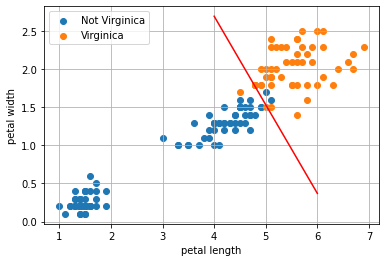

In [65]:
plt.scatter(X[:100, 0], X[:100, 1], label='Not Virginica')
plt.scatter(X[100:, 0], X[100:, 1], label='Virginica')

plt.plot(x, y, 'r-')

plt.grid()
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')

In [66]:
# iris 데이터에서 petal width만 선택, Softmax Regression 수행
iris = load_iris()
X, y = iris['data'], iris['target']

In [67]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [68]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
X = X[:, 3:]
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [72]:
log_reg = LogisticRegression(multi_class='multinomial', random_state=1)
# 파라미터 multi_class='multinomial'을 지정하면 Softmax Regression
# (주의) multi_class='multinomial' 지정한 경우에는 solver='liblinear'는 사용할 수 없음!

In [73]:
log_reg.fit(X, y)  # 모델 훈련.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
bias, weights = log_reg.intercept_, log_reg.coef_

In [75]:
bias

array([ 4.5519361,  1.1522765, -5.7042126])

In [76]:
weights

array([[-4.29549978],
       [ 0.06766414],
       [ 4.22783565]])

In [78]:
y_pred_probs = log_reg.predict_proba(X)
y_pred_probs[:5]

array([[9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04]])

In [79]:
y_pred_probs[-5:]

array([[8.17452760e-05, 6.22694012e-02, 9.37648854e-01],
       [1.94837696e-03, 2.59134839e-01, 7.38916784e-01],
       [9.12301260e-04, 1.87707184e-01, 8.11380514e-01],
       [8.17452760e-05, 6.22694012e-02, 9.37648854e-01],
       [4.02104866e-03, 3.45702362e-01, 6.50276589e-01]])

In [80]:
y_preds = log_reg.predict(X)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
confusion_matrix(y, y_preds)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])

In [83]:
report = classification_report(y, y_preds, target_names=iris['target_names'])
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



* Softmax Regression에서 확률 계산과 예측값 계산.

In [84]:
bias, weights = log_reg.intercept_, log_reg.coef_
bias
# bias의 shape: (k,) k는 클래스의 개수

array([ 4.5519361,  1.1522765, -5.7042126])

In [85]:
weights
# weights의 shape: (k, n) k는 클래스의 개수, n은 특성의 개수

array([[-4.29549978],
       [ 0.06766414],
       [ 4.22783565]])

In [86]:
sample = X[0]
sample

array([0.2])

In [89]:
# sample이 setosa가 될 확률을 계산하기 위한 점수
score_0 = np.exp(bias[0] + weights[0, 0] * X[0, 0])
# sample이 versicolor가 될 확률을 계산하기 위한 점수
score_1 = np.exp(bias[1] + weights[1, 0] * X[0, 0])
# sample이 virginica가 될 확률을 계산하기 위한 점수
score_2 = np.exp(bias[2] + weights[2, 0] * X[0, 0])

score_sum = score_0 + score_1 + score_2

# 각 클래스에 속할 확률
p_0 = score_0 / score_sum
p_1 = score_1 / score_sum
p_2 = score_2 / score_sum

p_0, p_1, p_2

(0.9258492246144512, 0.07397184710559866, 0.0001789282799502253)

In [90]:
y_pred_probs[0]

array([9.25849225e-01, 7.39718471e-02, 1.78928280e-04])

In [91]:
def softmax_probabilities(X, bias, weights):
    """X shape: (m, n), bias shape: (k,), weights: (k, n)
    m: 샘플 개수, n: 특성 개수, k: 클래스 개수
    """
    theta = np.c_[bias.reshape((-1, 1)), weights]  # (k, n+1) shape
    X_b = np.c_[np.ones((len(X), 1)), X]  # (m, n+1) shape
    score = np.exp(X_b @ theta.T)  # (m, n+1) @ (n+1, k) = (m, k) shape
    score_sum = np.sum(score, axis=1, keepdims=True)
    return score / score_sum

In [92]:
probabilitis = softmax_probabilities(X, bias, weights)
probabilitis[:5]

array([[9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04],
       [9.25849225e-01, 7.39718471e-02, 1.78928280e-04]])

In [93]:
probabilitis[-5:]

array([[8.17452760e-05, 6.22694012e-02, 9.37648854e-01],
       [1.94837696e-03, 2.59134839e-01, 7.38916784e-01],
       [9.12301260e-04, 1.87707184e-01, 8.11380514e-01],
       [8.17452760e-05, 6.22694012e-02, 9.37648854e-01],
       [4.02104866e-03, 3.45702362e-01, 6.50276589e-01]])

In [94]:
def softmax_predictions(X, bias, weights):
    probabilitis = softmax_probabilities(X, bias, weights)
    return np.argmax(probabilitis, axis=1)

In [95]:
softmax_predictions(X, bias, weights)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* iris 전체 샘플을 LogisticRegression(multi_class='mulitinomial') 모델로 훈련
* 분류 리포트 출력
* 모델의 intercept_, coef_ 확인

In [96]:
X, y = iris['data'], iris['target']

In [98]:
# 모델 생성
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1e3,
                             random_state=1)
# 모델 훈련
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000.0,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
# 훈련된 모델에서 훈련 셋의 예측값을 계산
y_preds = log_reg.predict(X)
# 훈련된 모델 평가.
report = classification_report(y, y_preds, target_names=iris['target_names'])
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [101]:
confusion_matrix(y, y_preds)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [102]:
bias = log_reg.intercept_
bias  # (k,) 1d array: k-클래스 개수

array([  9.84902418,   2.23817992, -12.0872041 ])

In [103]:
weights = log_reg.coef_
weights  # (k, n) 2d array: k-클래스 개수, n-특성 개수

array([[-0.42316549,  0.96688516, -2.51669376, -1.08078412],
       [ 0.53431322, -0.32159716, -0.20666272, -0.94355211],
       [-0.11114773, -0.645288  ,  2.72335648,  2.02433623]])

In [106]:
soft_preds = softmax_predictions(X, bias, weights)
rand_index = np.random.randint(0, 150, 10)
print('index:', rand_index)
print('fn:', soft_preds[rand_index])
print('model', y_preds[rand_index])

index: [127 111 143 130  77   9  92 119  40   2]
fn: [2 2 2 2 2 0 1 2 0 0]
model [2 2 2 2 2 0 1 2 0 0]
